# Pymaceuticals Inc.
---

### Analysis

- The correlation between mouse weight and the average tumor volume is: 0.8419. This suggests a strong positive correlation, and conclude that increase in mouse weight, increases the average tumor volume.
- Capomulin and Ramicane seems to be most effective drugs amongst other drugs used for testing in reducing the size of tumors in mice population.
- As per the piecharts, the size of male and female population is nearly equally distributed
 

In [84]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Check the files in the directory
import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#mouse_metadata
#study_results

# Combine the data into a single DataFrame

pymadata_merged = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview

pymadata_merged.head()
pymadata_merged.columns

desired_column_order01 = ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']
pymadata_merged_ordered = pymadata_merged[desired_column_order01]
pymadata_merged_ordered.head()

data/Mouse_metadata.csv
data/Study_results.csv


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [86]:
# Checking the number of mice.
numofmice = pymadata_merged_ordered['Mouse ID'].nunique()
numofmice

249

In [87]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateMiceIDS = pymadata_merged_ordered[pymadata_merged_ordered.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicateMiceIDS

array(['g989'], dtype=object)

In [88]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateMouseData_ordered = pymadata_merged_ordered.loc[pymadata_merged_ordered["Mouse ID"] == "g989", :]
duplicateMouseData_ordered

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [89]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
pymadataDuplicateCleaned = pymadata_merged_ordered[pymadata_merged_ordered['Mouse ID'].isin(duplicateMiceIDS)==False]
pymadataDuplicateCleaned.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [82]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# DataFrame with the duplicate data removed

#pymadataDuplicateCleaned = pymadata_merged_ordered.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
#pymadataDuplicateCleaned = pymadata_merged_ordered.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
#pymadataDuplicateCleaned = pymadata_merged_ordered.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')

#pymadataDuplicateCleaned = pymadata_merged_ordered.drop_duplicates(subset=['Mouse ID'], keep='first')
#pymadataDuplicateCleaned.head()

#pymadataDuplicateCleaned = pymadata_merged_ordered["Mouse ID"].nunique()
pymadataDuplicateCleaned = pymadata_merged_ordered[pymadata_merged_ordered['Mouse ID'].isin(duplicateMouseData_ordered)==False]

pymadataDuplicateCleaned.head()

    

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [90]:
# Checking the number of mice in the clean DataFrame.
pymadataDuplicateCleaned['Mouse ID'].nunique()

248

## Summary Statistics

In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = pymadataDuplicateCleaned['Tumor Volume (mm3)'].groupby(pymadataDuplicateCleaned['Drug Regimen']).mean()
median = pymadataDuplicateCleaned['Tumor Volume (mm3)'].groupby(pymadataDuplicateCleaned['Drug Regimen']).median()
var = pymadataDuplicateCleaned['Tumor Volume (mm3)'].groupby(pymadataDuplicateCleaned['Drug Regimen']).var()
std = pymadataDuplicateCleaned['Tumor Volume (mm3)'].groupby(pymadataDuplicateCleaned['Drug Regimen']).std()
sem = pymadataDuplicateCleaned['Tumor Volume (mm3)'].groupby(pymadataDuplicateCleaned['Drug Regimen']).sem()

singleSummaryDF = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
singleSummaryDF

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [91]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
#summaryData =  pymadataDuplicateCleaned.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])

drugRegimen = pymadataDuplicateCleaned.groupby(['Drug Regimen'])
summaryData = drugRegimen['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

summaryData

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [50]:
numofMice = pymadataDuplicateCleaned["Drug Regimen"].value_counts()
numofMice

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

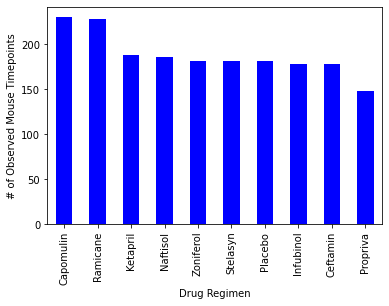

In [94]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for 
# each drug regimen using Pandas.
plot_pandas = numofMice.plot.bar(color='b')  
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
#plt.title("Number of Mice per Treatment")

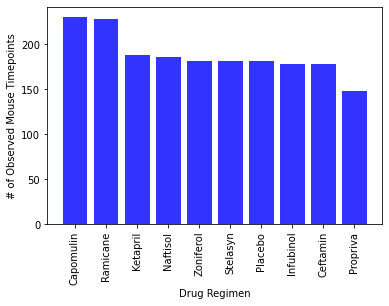

In [95]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) 
#for each drug regimen using pyplot.
x_axis = numofMice.index.values
y_axis = numofMice.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

# Set the xlabel and ylabel, title using class methods
#plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")

plt.show()

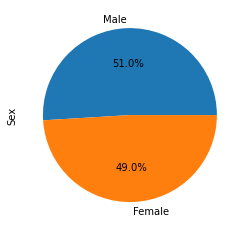

In [96]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

countByGender = pymadataDuplicateCleaned['Sex'].value_counts()
countByGender.plot(kind='pie', autopct='%1.1f%%', startangle=0)
plt.show()

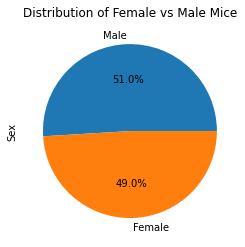

In [107]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

countByGender = pymadataDuplicateCleaned['Sex'].value_counts()
plt.pie(countByGender, labels=countByGender.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [185]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

CapomulinDF = pymadataDuplicateCleaned.loc[pymadataDuplicateCleaned["Drug Regimen"] == "Capomulin",:]
RamicaneDF = pymadataDuplicateCleaned.loc[pymadataDuplicateCleaned["Drug Regimen"] == "Ramicane", :]
InfubinolDF = pymadataDuplicateCleaned.loc[pymadataDuplicateCleaned["Drug Regimen"] == "Infubinol", :]
CeftaminDF = pymadataDuplicateCleaned.loc[pymadataDuplicateCleaned["Drug Regimen"] == "Ceftamin", :]

CapomulinLast = CapomulinDF.groupby('Mouse ID').max()['Timepoint']
CapomulinVol = pd.DataFrame(CapomulinLast)
CapomulinMerge = pd.merge(CapomulinVol, pymadataDuplicateCleaned, on=("Mouse ID","Timepoint"),how="left")
CapomulinMerge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [163]:
# Start by getting the last (greatest) timepoint for each mouse

listofDrugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
combinedwithDrugs = pymadataDuplicateCleaned[pymadataDuplicateCleaned["Drug Regimen"].isin(listofDrugs)]
combinedwithDrugs.head()

lastTimepoint = combinedwithDrugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
#Reshape dataframe
lastTimepoint = lastTimepoint.stack(level=0).unstack(level=0)
for adrug in listofDrugs:
    print(adrug)


Capomulin
Ramicane
Infubinol
Ceftamin


In [186]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorVolumeData = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumorVolume = combinedwithDrugs.loc[combinedwithDrugs["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumorVolumeData.append(tumorVolume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumorVolume.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumorVolume.loc[(tumorVolume < lower_bound) | (tumorVolume > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


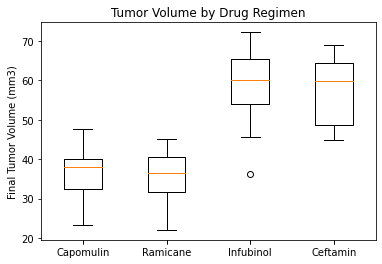

In [196]:
boxplotList = []
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

for drug in listofDrugs:
    boxplot_list.append(list(lastTimepoint[drug].dropna()))
    
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig = plt.figure()
#plt.xlabel listofDrugs
plt.xticks([1,2,3,4], listofDrugs, rotation=0)
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Tumor Volume by Drug Regimen")
#plt.boxplot(boxplotList, labels=["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.boxplot(boxplotList, labels=treatments)

plt.show()



## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

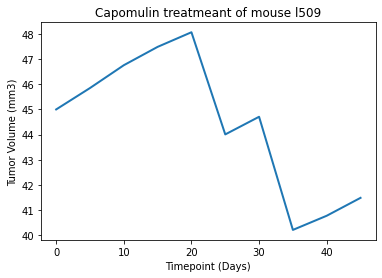

In [200]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

import matplotlib.pyplot as plt

CapomulinDF = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
#CapomulinDF.head()
xAxis = CapomulinDF["Timepoint"]
tumorVolume = CapomulinDF["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(xAxis, tumorVolume,linewidth=2, markersize=15,label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')



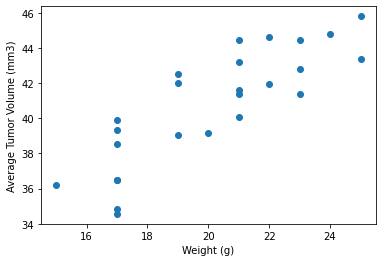

In [201]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the data to only include the Capomulin treatment regimen
#CapomulinDF = pymadataCleaned[pymadataCleaned['Drug Regimen'] == 'Capomulin']
CapomulinDF = combinedwithDrugs[combinedwithDrugs["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse in the Capomulin group
avgTumorVolume = CapomulinDF.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume data with the mouse metadata to get the weight for each mouse
capomulinDFPlusWeight = pd.merge(avgTumorVolume, mouse_metadata, on='Mouse ID')

# Create the scatter plot
plt.scatter(capomulinDFPlusWeight['Weight (g)'], capomulinDFPlusWeight['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.841936342469472


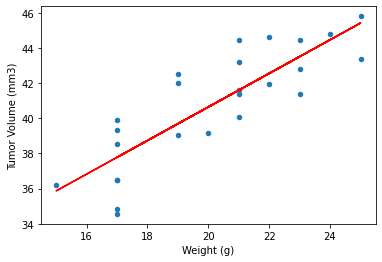

In [202]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Import dependencies
from scipy.stats import linregress

# Filter the Capomulin data
capomulinDF = combinedwithDrugs[combinedwithDrugs["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume for each mouse on Capomulin
avgTumorVolume = capomulinDF.groupby(["Mouse ID"]).mean()
#avgTumorVolume = CapomulinDF.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()


# Generate a scatter plot of mouse weight versus average tumor volume
ax = avgTumorVolume.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)")

# Calculate the correlation coefficient and linear regression model
slope, intercept, rvalue, pvalue, stderr = linregress(avgTumorVolume["Weight (g)"], avgTumorVolume["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is: {rvalue}")
#print(f"Linear regression equation: y = {slope}x + {intercept}")

# Add the linear regression line to the scatter plot
x = avgTumorVolume["Weight (g)"]
ax.plot(x, slope*x + intercept, color="red")